In [2]:
import os
import json

var = r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\prisoner_dilemma_test\llm_vs_llm\results\base"

json_data_list = []

for root, _, files in os.walk(var):
    for filename in files:
        if filename.endswith(".json"):
            file_path = os.path.join(root, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                try:
                    data = json.load(f)
                    json_data_list.append(data)
                except json.JSONDecodeError as e:
                    print(f"Failed to load {file_path}: {e}")
                    
                    

In [10]:
agent_1_array = []
agent_2_array = []

for i, item in enumerate(json_data_list):
    if not isinstance(item, dict):
        continue
    
    print(item["model_1"])
    print(item["model_2"])
    
    temp1_arr = [item["model_1"]]
    temp2_arr = [item["model_2"]]
    
    for idx, round_data in enumerate(item["game_data"]["move_history"]):
        
        temp1_arr.append(1 if round_data[0] in ['Cooperate', 'Concede'] else 0)
        temp2_arr.append(1 if round_data[1] in ['Cooperate', 'Concede'] else 0)
    
    
    agent_1_array.append(temp1_arr)
    agent_2_array.append(temp2_arr)
    
print(agent_1_array)
print(agent_2_array)

anthropic_claude-sonnet-4
google_gemini-2.0-flash-001
openai_gpt-4o-mini
anthropic_claude-sonnet-4
openai_gpt-4o-mini
google_gemini-2.0-flash-001
[['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
[['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


sfem_analysis

In [19]:
import os
import json
import numpy as np
from collections import defaultdict

def sfem_analysis(player_moves, opponent_moves):
    player_name = player_moves[0]
    opponent_name = opponent_moves[0]

    player_moves = np.array(player_moves[1:])
    opponent_moves = np.array(opponent_moves[1:])
    n = len(player_moves)

    if len(opponent_moves) != n:
        raise ValueError("player_moves and opponent_moves must be of the same length")

    expected_tft = np.ones(n)
    expected_tft[1:] = opponent_moves[:-1]

    expected_ac = np.ones(n)
    expected_ad = np.zeros(n)

    expected_gt = np.ones(n)
    triggered = False
    for i in range(n):
        if opponent_moves[i] == 0:
            triggered = True
        if triggered:
            expected_gt[i] = 0

    strategies = [expected_tft, expected_ac, expected_ad, expected_gt]
    likelihoods = np.array([
        np.mean(player_moves == strategy) for strategy in strategies
    ])
    likelihoods /= max(np.sum(likelihoods), 1e-10)

    return {
        "player": player_name,
        "opponent": opponent_name,
        "likelihoods": {
            "Tit-for-Tat": likelihoods[0],
            "Always Cooperate": likelihoods[1],
            "Always Defect": likelihoods[2],
            "Grim Trigger": likelihoods[3]
        }
    }

import os
import json

var = r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\prisoner_dilemma_test\llm_vs_llm\results\base"

json_data_list = []

for root, _, files in os.walk(var):
    for filename in files:
        if filename.endswith(".json"):
            file_path = os.path.join(root, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                try:
                    data = json.load(f)
                    json_data_list.append(data)
                except json.JSONDecodeError as e:
                    print(f"Failed to load {file_path}: {e}")
                    

agent_1_array = []
agent_2_array = []

for i, item in enumerate(json_data_list):
    if not isinstance(item, dict):
        continue
    
    print(item["model_1"])
    print(item["model_2"])
    
    temp1_arr = [item["model_1"]]
    temp2_arr = [item["model_2"]]
    
    for idx, round_data in enumerate(item["game_data"]["move_history"]):
        
        temp1_arr.append(1 if round_data[0] in ['Cooperate', 'Concede'] else 0)
        temp2_arr.append(1 if round_data[1] in ['Cooperate', 'Concede'] else 0)
    
    
    agent_1_array.append(temp1_arr)
    agent_2_array.append(temp2_arr)
    
print(agent_1_array)
print(agent_2_array)

output_data = []
output_data.append(sfem_analysis(agent_1_array[0],agent_2_array[0]))
output_data.append(sfem_analysis(agent_1_array[1],agent_2_array[1]))
output_data.append(sfem_analysis(agent_1_array[2],agent_2_array[2]))

output_data.append(sfem_analysis(agent_2_array[0],agent_1_array[0]))
output_data.append(sfem_analysis(agent_2_array[1],agent_1_array[1]))
output_data.append(sfem_analysis(agent_2_array[2],agent_1_array[2]))

# === Write Output to JSON ===
output_path = os.path.join("./z_final_results/vs_llm/sfem", "base_sfem_summary.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(output_data, f, indent=4)

print(f"\n SFEM summary saved to: {output_path}")


anthropic_claude-sonnet-4
google_gemini-2.0-flash-001
openai_gpt-4o-mini
anthropic_claude-sonnet-4
openai_gpt-4o-mini
google_gemini-2.0-flash-001
[['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
[['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

 SFEM summary saved to: ./z_final_results/vs_llm/sfem\base_sfem_summary.json


bheavioural_dimentiosn_analysis V

In [23]:
import os
import json
import numpy as np

def behavioural_dimension_analysis(player_moves, opponent_moves):
    player_name = player_moves[0]
    opponent_name = opponent_moves[0]

    player = np.array(player_moves[1:])
    opponent = np.array(opponent_moves[1:])
    n = len(player)
    
    if len(opponent) != n:
        raise ValueError("player_moves and opponent_moves must be of the same length")

    # Nice
    never_defects_first = True
    if player[0] == 0:
        never_defects_first = False
    else:
        for t in range(1, n):
            if player[t] == 0 and opponent[t-1] == 1:
                never_defects_first = False
                break
    nice = 1 if never_defects_first else 0

    # Forgiving
    opp_defections = np.where(opponent == 0)[0]
    if len(opp_defections) == 0:
        forgiving = -1
    else:
        forgive_count = sum(1 for t in opp_defections if t + 1 < n and player[t+1] == 1)
        forgiving = forgive_count / len(opp_defections)

    # Retaliatory
    if len(opp_defections) == 0:
        retaliatory = -1
    else:
        retaliate_count = sum(1 for t in opp_defections if t + 1 < n and player[t+1] == 0)
        retaliatory = retaliate_count / len(opp_defections)


    # Troublemaking
    unprovoked_defections = 0
    for t in range(n):
        if player[t] == 0:
            if t == 0 or opponent[t-1] == 1:
                unprovoked_defections += 1
    troublemaking = unprovoked_defections / n

    # Emulative
    if n <= 1:
        emulative = -1
    else:
        match_count = sum(1 for t in range(1, n) if player[t] == opponent[t-1])
        emulative = match_count / (n - 1)

    return {
        "player": player_name,
        "opponent": opponent_name,
        "likelihoods": {
            "Nice": nice,
            "Forgiving": forgiving,
            "Retaliatory": retaliatory,
            "Troublemaking": troublemaking,
            "Emulative": emulative,
        }
    }


import os
import json

var = r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\prisoner_dilemma_test\llm_vs_llm\results\emotional"

json_data_list = []

for root, _, files in os.walk(var):
    for filename in files:
        if filename.endswith(".json"):
            file_path = os.path.join(root, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                try:
                    data = json.load(f)
                    json_data_list.append(data)
                except json.JSONDecodeError as e:
                    print(f"Failed to load {file_path}: {e}")
                    

agent_1_array = []
agent_2_array = []

for i, item in enumerate(json_data_list):
    if not isinstance(item, dict):
        continue
    
    print(item["model_1"])
    print(item["model_2"])
    
    temp1_arr = [item["model_1"]]
    temp2_arr = [item["model_2"]]
    
    for idx, round_data in enumerate(item["game_data"]["move_history"]):
        
        temp1_arr.append(1 if round_data[0] in ['Cooperate', 'Concede'] else 0)
        temp2_arr.append(1 if round_data[1] in ['Cooperate', 'Concede'] else 0)
    
    
    agent_1_array.append(temp1_arr)
    agent_2_array.append(temp2_arr)
    
print(agent_1_array)
print(agent_2_array)

output_data = []
output_data.append(behavioural_dimension_analysis(agent_1_array[0],agent_2_array[0]))
output_data.append(behavioural_dimension_analysis(agent_1_array[1],agent_2_array[1]))
output_data.append(behavioural_dimension_analysis(agent_1_array[2],agent_2_array[2]))

output_data.append(behavioural_dimension_analysis(agent_2_array[0],agent_1_array[0]))
output_data.append(behavioural_dimension_analysis(agent_2_array[1],agent_1_array[1]))
output_data.append(behavioural_dimension_analysis(agent_2_array[2],agent_1_array[2]))

# === Write Output to JSON ===
output_path = os.path.join("./z_final_results/vs_llm/behavioural", "emotional_behavioural_analyses.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(output_data, f, indent=4)

print(f"\n SFEM summary saved to: {output_path}")

anthropic_claude-sonnet-4
google_gemini-2.0-flash-001
openai_gpt-4o-mini
google_gemini-2.0-flash-001
openai_gpt-4o-mini
anthropic_claude-sonnet-4
[['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
[['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

 SFEM summary saved to: ./z_final_results/vs_llm/behavioural\emotional_behavioural_analyses.json


probablistic sfem

In [18]:
import os
import json
import numpy as np
from collections import defaultdict
from scipy.optimize import minimize

# [Include the corrected SFEM functions from the previous artifact here]
def softmax(x):
    """Convert logits to probabilities"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def compute_strategy_predictions(opponent_moves):
    """
    Compute what each strategy would do given opponent's history
    Returns: (n_strategies, n_rounds) array where each entry is the predicted action (0 or 1)
    """
    n = len(opponent_moves)
    
    # Tit-for-Tat: Cooperate first, then copy opponent's previous move
    tft = np.ones(n)
    if n > 1:
        tft[1:] = opponent_moves[:-1]
    
    # Always Cooperate
    always_coop = np.ones(n)
    
    # Always Defect
    always_defect = np.zeros(n)
    
    # Grim Trigger: Cooperate until opponent defects once, then always defect
    grim = np.ones(n)
    triggered = False
    for i in range(n):
        if i > 0 and opponent_moves[i-1] == 0:  # Opponent defected in previous round
            triggered = True
        if triggered:
            grim[i] = 0
    
    return np.vstack([tft, always_coop, always_defect, grim])

def neg_log_likelihood(log_weights, player_moves, strategy_preds):
    """
    Compute negative log-likelihood of the mixture model
    """
    weights = softmax(log_weights)
    eps = 1e-12  # numerical stability
    
    n_strategies, n_rounds = strategy_preds.shape
    total_log_likelihood = 0.0
    
    # For each round t
    for t in range(n_rounds):
        actual_action = player_moves[t]
        
        # Compute mixture probability for this round
        mixture_prob = 0.0
        for i in range(n_strategies):
            strategy_prediction = strategy_preds[i, t]
            
            # P(a_t | s_i): probability that strategy i predicts actual action
            if actual_action == 1:  # Player cooperated
                prob_action_given_strategy = strategy_prediction
            else:  # Player defected
                prob_action_given_strategy = 1 - strategy_prediction
            
            mixture_prob += weights[i] * prob_action_given_strategy
        
        # Add log of mixture probability (with numerical stability)
        total_log_likelihood += np.log(mixture_prob + eps)
    
    return -total_log_likelihood  # Return negative for minimization

def sfem_analysis(player_moves, opponent_moves):
    """
    Perform probabilistic SFEM analysis
    """
    player_name = player_moves[0]
    opponent_name = opponent_moves[0]
    
    player_moves_data = np.array(player_moves[1:], dtype=float)
    opponent_moves_data = np.array(opponent_moves[1:], dtype=float)
    
    if len(player_moves_data) != len(opponent_moves_data):
        raise ValueError("player_moves and opponent_moves must have the same length")
    
    if len(player_moves_data) == 0:
        raise ValueError("No moves to analyze")
    
    # Compute what each strategy would predict
    strategy_preds = compute_strategy_predictions(opponent_moves_data)
    
    # Initialize weights (log scale for numerical stability)
    init_log_weights = np.zeros(strategy_preds.shape[0])
    
    try:
        # Optimize mixture weights
        result = minimize(
            neg_log_likelihood,
            init_log_weights,
            args=(player_moves_data, strategy_preds),
            method='L-BFGS-B',
            options={'maxiter': 1000}
        )
        
        if not result.success:
            print(f"Warning: Optimization did not converge for {player_name}. Message: {result.message}")
        
        # Convert back to probabilities
        strategy_weights = softmax(result.x)
        
    except Exception as e:
        print(f"Error in optimization for {player_name}: {e}")
        # Return uniform weights as fallback
        strategy_weights = np.ones(strategy_preds.shape[0]) / strategy_preds.shape[0]
        result = None
    
    strategy_names = ["Tit-for-Tat", "Always Cooperate", "Always Defect", "Grim Trigger"]
    
    return {
        "player": player_name,
        "opponent": opponent_name,
        "log_likelihood": -result.fun if result and result.success else None,
        "convergence": result.success if result else False,
        "strategy_weights": {
            strategy_names[i]: float(strategy_weights[i]) 
            for i in range(len(strategy_names))
        }
    }

import os
import json

var = r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\prisoner_dilemma_test\llm_vs_llm\results\base"

json_data_list = []

for root, _, files in os.walk(var):
    for filename in files:
        if filename.endswith(".json"):
            file_path = os.path.join(root, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                try:
                    data = json.load(f)
                    json_data_list.append(data)
                except json.JSONDecodeError as e:
                    print(f"Failed to load {file_path}: {e}")
                    

agent_1_array = []
agent_2_array = []

for i, item in enumerate(json_data_list):
    if not isinstance(item, dict):
        continue
    
    print(item["model_1"])
    print(item["model_2"])
    
    temp1_arr = [item["model_1"]]
    temp2_arr = [item["model_2"]]
    
    for idx, round_data in enumerate(item["game_data"]["move_history"]):
        
        temp1_arr.append(1 if round_data[0] in ['Cooperate', 'Concede'] else 0)
        temp2_arr.append(1 if round_data[1] in ['Cooperate', 'Concede'] else 0)
    
    
    agent_1_array.append(temp1_arr)
    agent_2_array.append(temp2_arr)
    
print(agent_1_array)
print(agent_2_array)

output_data = []
output_data.append(sfem_analysis(agent_1_array[0],agent_2_array[0]))
output_data.append(sfem_analysis(agent_1_array[1],agent_2_array[1]))
output_data.append(sfem_analysis(agent_1_array[2],agent_2_array[2]))

output_data.append(sfem_analysis(agent_2_array[0],agent_1_array[0]))
output_data.append(sfem_analysis(agent_2_array[1],agent_1_array[1]))
output_data.append(sfem_analysis(agent_2_array[2],agent_1_array[2]))

# === Write Output to JSON ===
output_path = os.path.join("./z_final_results/vs_llm/probabilistic_sfem", "base_sfem_summary.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(output_data, f, indent=4)

print(f"\n SFEM summary saved to: {output_path}")


anthropic_claude-sonnet-4
google_gemini-2.0-flash-001
openai_gpt-4o-mini
anthropic_claude-sonnet-4
openai_gpt-4o-mini
google_gemini-2.0-flash-001
[['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['openai_gpt-4o-mini', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
[['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['anthropic_claude-sonnet-4', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['google_gemini-2.0-flash-001', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

 SFEM summary saved to: ./z_final_results/vs_llm/probabilistic_sfem\base_sfem_summary.json


sfem outputs

Successfully loaded data from: C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\z_final_results\vs_llm\probabilistic_sfem\role_sfem_summary.json
Number of entries: 12


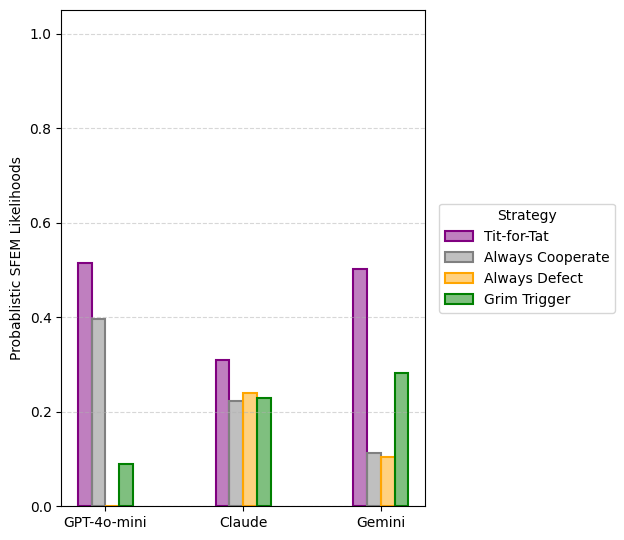


Summary of Average Strategy Weights (Role Scenarios):

GPT-4o-mini:
  Tit-for-Tat         : 0.513937
  Always Cooperate    : 0.396004
  Always Defect       : 0.000000
  Grim Trigger        : 0.090059
  Dominant strategy: Tit-for-Tat (0.513937)

Claude:
  Tit-for-Tat         : 0.308656
  Always Cooperate    : 0.221890
  Always Defect       : 0.239583
  Grim Trigger        : 0.229871
  Dominant strategy: Tit-for-Tat (0.308656)

Gemini:
  Tit-for-Tat         : 0.501896
  Always Cooperate    : 0.113753
  Always Defect       : 0.103401
  Grim Trigger        : 0.280950
  Dominant strategy: Tit-for-Tat (0.501896)


In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from collections import defaultdict

# === Configurable Parameters ===
model_spacing = 0.5      # Distance between models on the x-axis
bar_width = 0.05         # Width of each individual strategy bar
bar_alpha = 0.5          # Transparency of bar face colors

# === Load Data ===
file_path = r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\z_final_results\vs_llm\probabilistic_sfem\role_sfem_summary.json"

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print(f"Successfully loaded data from: {file_path}")
    print(f"Number of entries: {len(data)}")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# === Setup ===
strategies = ["Tit-for-Tat", "Always Cooperate", "Always Defect", "Grim Trigger"]
colors = ['purple', 'grey', 'orange', 'green']
name_map = {
    "openai_gpt-4o-mini": "GPT-4o-mini",
    "anthropic_claude-sonnet-4": "Claude",
    "google_gemini-2.0-flash-001": "Gemini",
}

# === Average Strategy Weights ===
model_strategies = defaultdict(lambda: defaultdict(list))
for entry in data:
    model_name = entry["model_name"]
    for strategy, weight in entry["strategy_weights"].items():
        model_strategies[model_name][strategy].append(weight)

model_averages = {
    model: {
        strategy: np.mean(weights)
        for strategy, weights in strategies_dict.items()
    }
    for model, strategies_dict in model_strategies.items()
}

# === Plot ===
models = list(model_averages.keys())
x = np.arange(len(models)) * model_spacing

fig, ax = plt.subplots(figsize=(8, 5.5))  # Slightly smaller size

for i, (strategy, color) in enumerate(zip(strategies, colors)):
    rgba_color = mcolors.to_rgba(color, alpha=bar_alpha)
    heights = [model_averages[model][strategy] for model in models]

    bars = ax.bar(
        x + i * bar_width - 1.5 * bar_width,
        heights,
        bar_width,
        edgecolor=color,
        facecolor=rgba_color,
        linewidth=1.5,
        label=strategy
    )

# === Formatting ===
ax.set_xticks(x)
ax.set_xticklabels([name_map.get(model, model) for model in models])
ax.set_ylim(0, 1.05)
ax.set_ylabel("Probablistic SFEM Likelihoods")
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# === Legend outside ===
ax.legend(title="Strategy", loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for the legend
plt.show()

# === Summary Stats ===
print("\nSummary of Average Strategy Weights (Role Scenarios):")
print("=" * 60)
for model in models:
    print(f"\n{name_map.get(model, model)}:")
    for strategy in strategies:
        weight = model_averages[model][strategy]
        print(f"  {strategy:<20}: {weight:.6f}")
    dominant_strategy = max(model_averages[model].items(), key=lambda x: x[1])
    print(f"  Dominant strategy: {dominant_strategy[0]} ({dominant_strategy[1]:.6f})")


Behavioural Analyses
Table

In [30]:
import json
import pandas as pd
import numpy as np

# Load the data
with open(r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\z_final_results\vs_llm\behavioural\role_behavioural_analyses.json") as f:
    data = json.load(f)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)

# Expand the behavioral_dimensions column into separate columns
behavioral_cols = pd.json_normalize(df['behavioral_dimensions'])
df = pd.concat([df.drop('behavioral_dimensions', axis=1), behavioral_cols], axis=1)

# Group by player and opponent, then calculate means
grouped = df.groupby(['player', 'opponent']).agg({
    'Nice': 'mean',
    'Forgiving': 'mean', 
    'Retaliatory': 'mean',
    'Troublemaking': 'mean',
    'Emulative': 'mean'
}).round(3)

# Reset index to make it easier to work with
grouped_reset = grouped.reset_index()

# Create a pivot table for better presentation
pivot_table = grouped_reset.pivot(index='player', columns='opponent', values=['Nice', 'Forgiving', 'Retaliatory', 'Troublemaking', 'Emulative'])

print("=== BEHAVIORAL DIMENSIONS BY MODEL AND OPPOSING STRATEGY ===")
print("(Values are averages across all games with same model and opposing strategy)")
print()

# Print the pivot table in a more readable format
for behavior in ['Nice', 'Forgiving', 'Retaliatory', 'Troublemaking', 'Emulative']:
    print(f"--- {behavior.upper()} ---")
    behavior_table = pivot_table[behavior].fillna('-')
    print(behavior_table.to_string())
    print()

# Alternative: Create a single comprehensive table
print("=== COMPREHENSIVE TABLE ===")
print()

# Reshape for a single table with multi-level columns
comprehensive_table = pd.DataFrame()

for model in grouped_reset['player'].unique():
    model_data = grouped_reset[grouped_reset['player'] == model]
    model_data_formatted = model_data.set_index('opponent')[['Nice', 'Forgiving', 'Retaliatory', 'Troublemaking', 'Emulative']].T
    model_data_formatted.columns = [f"{model}_{col}" for col in model_data_formatted.columns]
    if comprehensive_table.empty:
        comprehensive_table = model_data_formatted
    else:
        comprehensive_table = pd.concat([comprehensive_table, model_data_formatted], axis=1)

print(comprehensive_table.to_string())
print()

# Create a clean table for academic presentation
print("=== ACADEMIC PRESENTATION TABLE ===")
print()

# Clean model names for presentation
model_name_mapping = {
    'openai_gpt-4o-mini': 'GPT-4o-mini',
    'anthropic_claude-sonnet-4': 'Claude Sonnet 4', 
    'google_gemini-2.0-flash-001': 'Gemini 2.0 Flash'
}

# Clean strategy names
strategy_name_mapping = {
    '20_defection_rate': '20% Defection',
    '50_defection_rate': '50% Defection', 
    '80_defection_rate': '80% Defection',
    'tit_for_tat': 'Tit-for-Tat'
}

# Create the final presentation table
final_table = grouped_reset.copy()
final_table['player'] = final_table['player'].map(model_name_mapping)
final_table['opponent'] = final_table['opponent'].map(strategy_name_mapping) 

# Sort by model and strategy for consistent presentation
final_table = final_table.sort_values(['player', 'opponent'])

print("Table 1: Behavioral Dimensions by Model and Opposing Strategy")
print("=" * 80)
print(f"{'Model':<18} {'Strategy':<15} {'Nice':<6} {'Forg.':<6} {'Retal.':<6} {'Trouble':<8} {'Emul.':<6}")
print("-" * 80)

for _, row in final_table.iterrows():
    print(f"{row['player']:<18} {row['opponent']:<15} {row['Nice']:<6.3f} {row['Forgiving']:<6.3f} {row['Retaliatory']:<6.3f} {row['Troublemaking']:<8.3f} {row['Emulative']:<6.3f}")

print()
print("Note: Values represent mean scores across all games for each model-strategy combination.")
print("Forg. = Forgiving, Retal. = Retaliatory, Trouble = Troublemaking, Emul. = Emulative")

=== BEHAVIORAL DIMENSIONS BY MODEL AND OPPOSING STRATEGY ===
(Values are averages across all games with same model and opposing strategy)

--- NICE ---
opponent                    anthropic_claude-sonnet-4 google_gemini-2.0-flash-001 openai_gpt-4o-mini
player                                                                                              
anthropic_claude-sonnet-4                           -                         0.0                0.0
google_gemini-2.0-flash-001                       0.0                           -                0.0
openai_gpt-4o-mini                                1.0                         1.0                  -

--- FORGIVING ---
opponent                    anthropic_claude-sonnet-4 google_gemini-2.0-flash-001 openai_gpt-4o-mini
player                                                                                              
anthropic_claude-sonnet-4                           -                       0.286                0.0
google_gemini-2.0-fla

Visual

In [ ]:
# Load and process data
with open(r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\z_final_results\vs_llm\behavioural\role_behavioural_analyses.json") as f:
    data = json.load(f)

Player averages across all opponents:
       player_clean  Nice  Forgiving  Retaliatory  Troublemaking  Emulative
0   Claude Sonnet 4   0.0      0.143        0.826          0.183      0.759
1       GPT-4o-mini   1.0      0.452        0.548          0.000      0.879
2  Gemini 2.0 Flash   0.0      0.567        0.400          0.083      0.862

Player behavior against each opponent:
       player_clean    opponent_clean  Nice  Forgiving  Retaliatory  \
0   Claude Sonnet 4       GPT-4o-mini   0.0      0.000        0.938   
1   Claude Sonnet 4  Gemini 2.0 Flash   0.0      0.286        0.714   
2       GPT-4o-mini   Claude Sonnet 4   1.0      0.238        0.762   
3       GPT-4o-mini  Gemini 2.0 Flash   1.0      0.667        0.333   
4  Gemini 2.0 Flash   Claude Sonnet 4   0.0      0.133        0.800   
5  Gemini 2.0 Flash       GPT-4o-mini   0.0      1.000        0.000   

   Troublemaking  Emulative  
0          0.200      0.828  
1          0.167      0.690  
2          0.000      0.828  


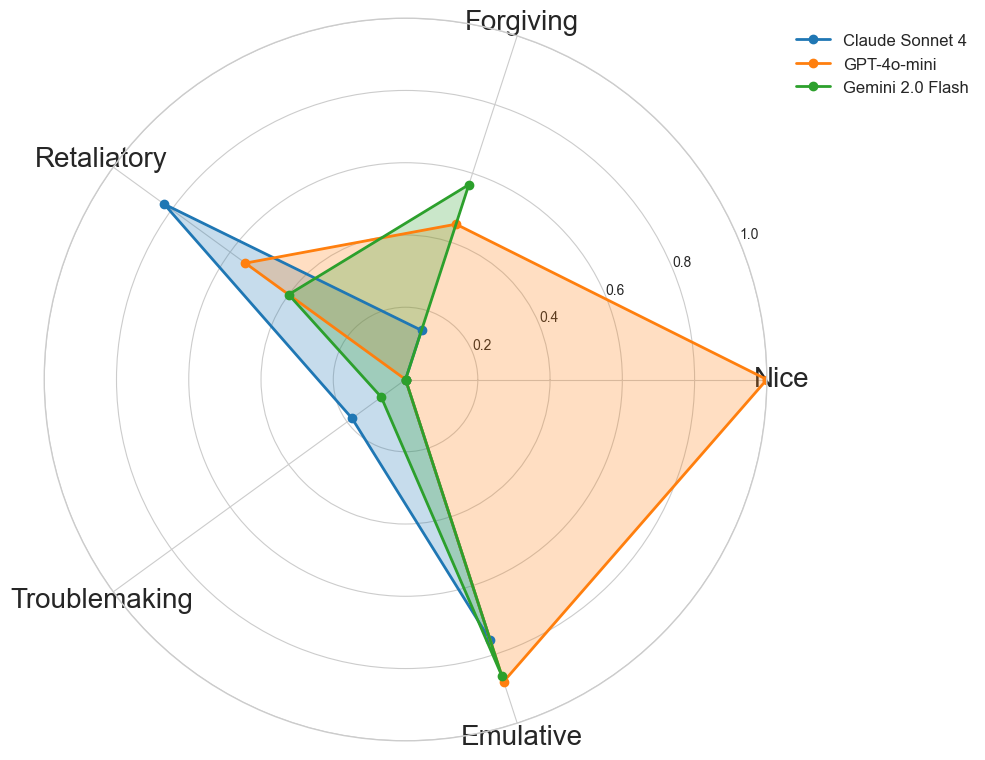

2. Behavior against each opponent:


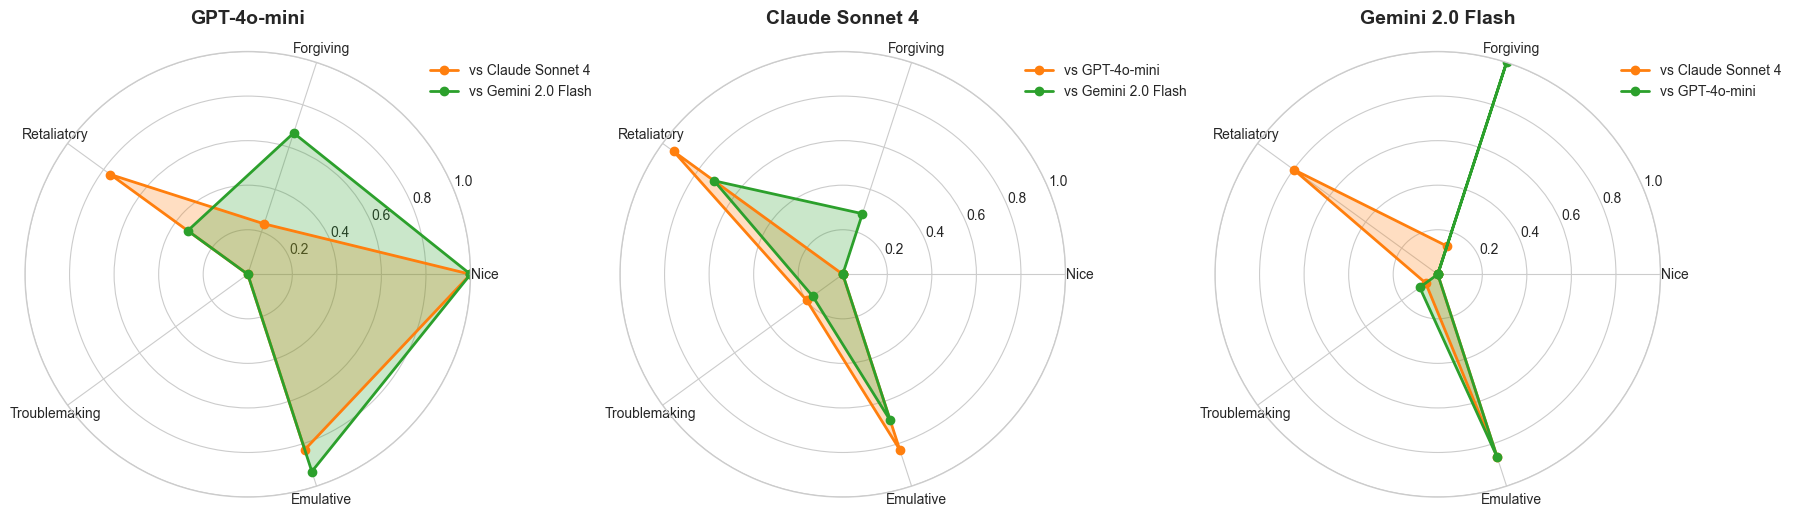

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Set style for academic papers
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load and process data
with open(r"C:\Users\ryanz\Desktop\UniversityProjects\LLM_Prisoners_Dillemma\z_final_results\vs_llm\behavioural\role_behavioural_analyses.json") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
behavioral_cols = pd.json_normalize(df['likelihoods'])
df = pd.concat([df.drop('likelihoods', axis=1), behavioral_cols], axis=1)

# Clean model names for visualization
model_name_mapping = {
    'openai_gpt-4o-mini': 'GPT-4o-mini',
    'anthropic_claude-sonnet-4': 'Claude Sonnet 4', 
    'google_gemini-2.0-flash-001': 'Gemini 2.0 Flash'
}

# Apply name mapping
df['player_clean'] = df['player'].map(model_name_mapping)
df['opponent_clean'] = df['opponent'].map(model_name_mapping)

# Group by player and calculate average across all opponents
player_averages = df.groupby('player_clean').agg({
    'Nice': 'mean',
    'Forgiving': 'mean', 
    'Retaliatory': 'mean',
    'Troublemaking': 'mean',
    'Emulative': 'mean'
}).round(3).reset_index()

print("Player averages across all opponents:")
print(player_averages)

# Alternative: Group by player-opponent pairs (shows behavior against each opponent)
pairwise_data = df.groupby(['player_clean', 'opponent_clean']).agg({
    'Nice': 'mean',
    'Forgiving': 'mean', 
    'Retaliatory': 'mean',
    'Troublemaking': 'mean',
    'Emulative': 'mean'
}).round(3).reset_index()

print("\nPlayer behavior against each opponent:")
print(pairwise_data)

# RADAR CHARTS - Option 1: Average behavior per player
def create_player_average_radar():
    """Create radar chart showing average behavior for each player"""
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Behavioral dimensions
    categories = ['Nice', 'Forgiving', 'Retaliatory', 'Troublemaking', 'Emulative']
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the circle
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    for idx, (_, row) in enumerate(player_averages.iterrows()):
        player = row['player_clean']
        values = [row[cat] for cat in categories]
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=2, label=player, color=colors[idx])
        ax.fill(angles, values, alpha=0.25, color=colors[idx])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=16)
    ax.set_ylim(0, 1)
    # ax.set_title('Average Behavioral Dimensions by Player', size=16, fontweight='bold', pad=30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12)
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# RADAR CHARTS - Option 2: Behavior against each opponent
def create_opponent_specific_radar():
    """Create radar charts showing how each player behaves against different opponents"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))
    
    # Behavioral dimensions
    categories = ['Nice', 'Forgiving', 'Retaliatory', 'Troublemaking', 'Emulative']
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the circle
    
    colors = ['#ff7f0e', '#2ca02c']  # Colors for opponents (excluding self)
    players = ['GPT-4o-mini', 'Claude Sonnet 4', 'Gemini 2.0 Flash']
    
    for idx, player in enumerate(players):
        ax = axes[idx]
        player_data = pairwise_data[pairwise_data['player_clean'] == player]
        
        color_idx = 0
        for _, row in player_data.iterrows():
            opponent = row['opponent_clean']
            # Skip self-matches (if any)
            if opponent == player:
                continue
                
            values = [row[cat] for cat in categories]
            values += values[:1]  # Complete the circle
            
            ax.plot(angles, values, 'o-', linewidth=2, label=f'vs {opponent}', color=colors[color_idx % len(colors)])
            ax.fill(angles, values, alpha=0.25, color=colors[color_idx % len(colors)])
            color_idx += 1
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)
        ax.set_ylim(0, 1)
        ax.set_title(f'{player}', size=14, fontweight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)
        ax.grid(True)
    
    plt.tight_layout()
    # plt.suptitle('Player Behavior Against Different Opponents', y=1.02, fontsize=16, fontweight='bold')
    plt.show()

# Execute visualizations
print("\nCreating visualizations...")
print("1. Average behavior per player:")
create_player_average_radar()

print("2. Behavior against each opponent:")
create_opponent_specific_radar()